# Convolution Neural Network with Fashion MNIST dataset


Hello! Welcome to the Convolution neural network with Fahsion MNIST datast notebook. Today we will be discussing how we can use Convolution neural networks to help us with our Fashion MNIST problem. Lets go!


## 1. What can machine learning models predict?

In the last workshop, you trained a model that took in an image (as input), and returned a prediction of which class it belonged to (as output). That was a form of **classification**. Some of you went further to determine where the cards were within the image. That was a form of **localization**. And some of you went on to classify which class each individual pixel in the image belonged to. That was a form of **image segmentation**.

In general, machine learning models take feature vectors as inputs. For computer vision, these feature vectors are calculated from the images. They are then fed into the model which consequently predicts a set of output. These outputs may include:

- For **image classification**, a class label for the image
- For **localization**, a class label for the image, and coordinates for the bounding box.
- For **object detection**, a list of bounding boxes (and class labels for object recognition) for objects detected.
- For **image segmentation**, a class label for each pixel in the image
- The output may also include the probability scores for the different class labels.



## Convolutional Neural Networks (CNN)

In the last workshop, we made use of basic machine learning algorithms such as kNN and SVM. In recent years, Convolutional Neural Networks (CNN) have gained great popularity due to its effectiveness. CNNs are a form of Neural Networks that are made up of a series of convolution filters. And the network learns the optimal filters (also known as weights) through the process of training. 

**What are convolutions?**

In simple terms, convolutions are a mathematical operations performed on the input to produce an output. It can also be used as a form of feature extraction. 

Convolutions can also be used for basic image processing. For example, blurring, sharpening, averaging, and bilateral filtering.

For CNNs, the model learns the optimal weights each of the convolution operations during training (instead of having them manually defined). Optimization techniques such as gradient descent are used (together with back propagation of errors) in order to calculate the optimal "weights" for each of the convolutions. We will not be going into the detailed implementation or math in this workshop, but you are always encouraged to [learn more](http://deeplearning.stanford.edu/tutorial/supervised/ConvolutionalNeuralNetwork/). 

### 1.1 Convolutions

Let us just apply a few convolution filters on a photograph of a printed circuit board (PCB) to somewhat visualize the concept of convolutions. **cv2.filter2D** is an image processing function in OpenCV that can be used to perform convolutions https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/filter_2d/filter_2d.html

<img src="images/convolutions.png" />

Notice how the words and circuit board patterns are clearer and sharper after some convolution filters are applied, compared to others. Does it remind you of thresholding in the earlier workshop? Convolutions can be used to extract meaningful features from input images. And in the context of CNNs, a series of convolutions are typically used (and not just 1).

Let us work through some code.

In [ ]:
import cv2              #Import the OpenCV Library
import numpy as np      #Import the Numpy library
import sys
from google.colab.patches import cv2_imshow
print ("You have successfully installed OpenCV version "+cv2.__version__)
print ("Your version of Python is " + sys.version)


You have successfully installed OpenCV version 4.1.2
Your version of Python is 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


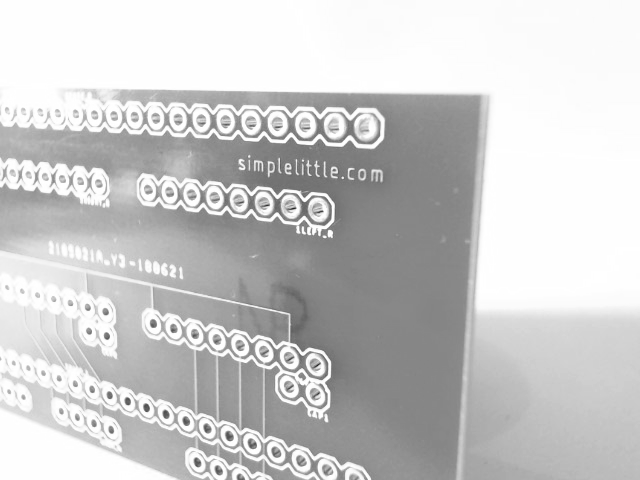

In [ ]:

# Let's quickly recap the code to read in an image
image = cv2.imread("/content/drive/My Drive/Classroom/[Work Files - Coach] Module 8/images/pcb.png")

# We convert it to greyscale to illustrate 2D convolutions.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the greyscale image
cv2_imshow(gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

Let's try to blur this image using a convolution filter as follows. How does the result compare to the original?

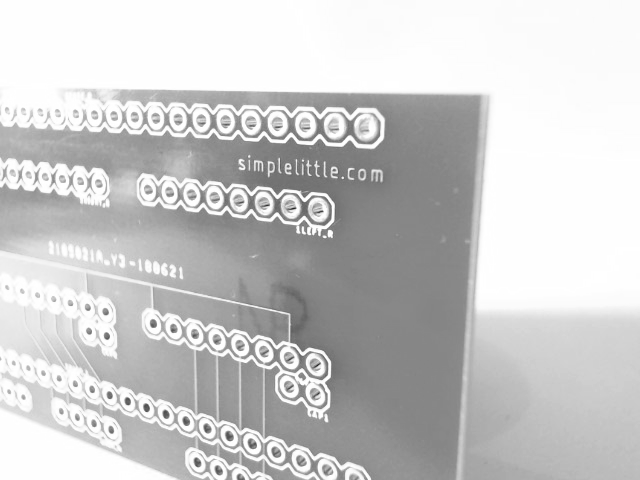

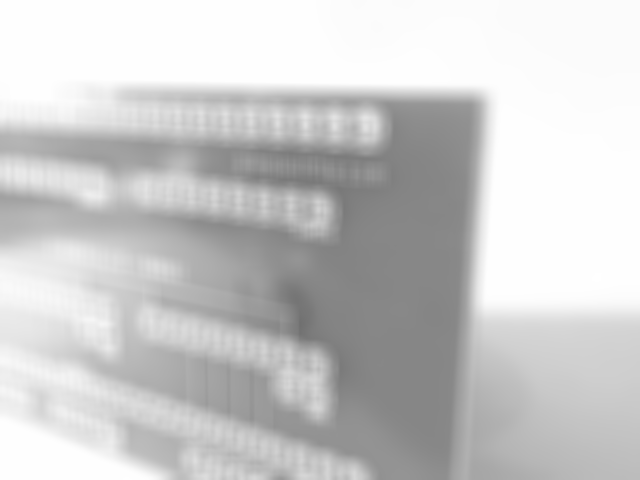

In [ ]:
kernel1 = np.ones((19,19),np.float32)/361      # a 19x19 convolution filter
filter1 = cv2.filter2D(gray,-1,kernel1)

cv2_imshow(gray)
cv2_imshow(filter1)
cv2.waitKey(0)
cv2.destroyAllWindows()

Let's try another filter

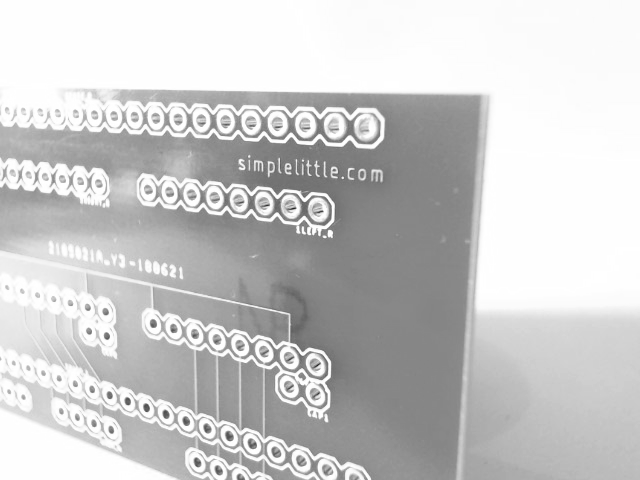

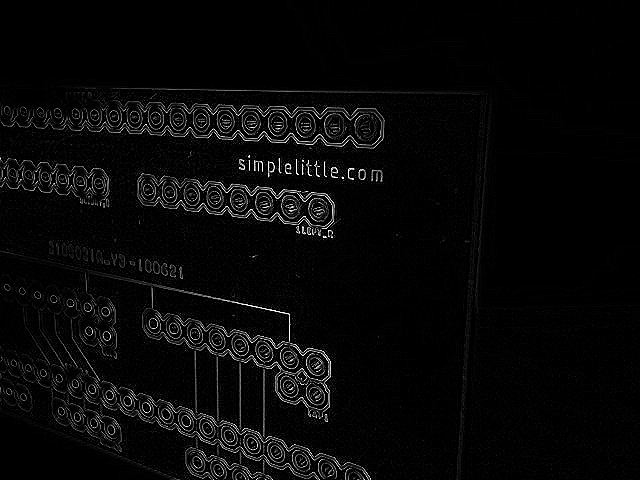

In [ ]:
kernel2 = np.array((                        # a 3x3 convolution filter
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]), np.float32)*2
filter2 = cv2.filter2D(gray,-1,kernel2)

cv2_imshow(gray)
cv2_imshow(filter2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Did you notice the 3x3 array of numbers in the code above? That is the convolution filter that is used to perform the mathematical operations on the input image. [Read more](http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/#convolutions) to see how the image can be transformed to a convolved feature using a filter like this. The example in the link illustrates the resulting feature vector output as smaller than the input. However, in our examples, the output maintains the same size as the input because cv2.filter2D adds a padding automatically.

Let's try 1 more filter

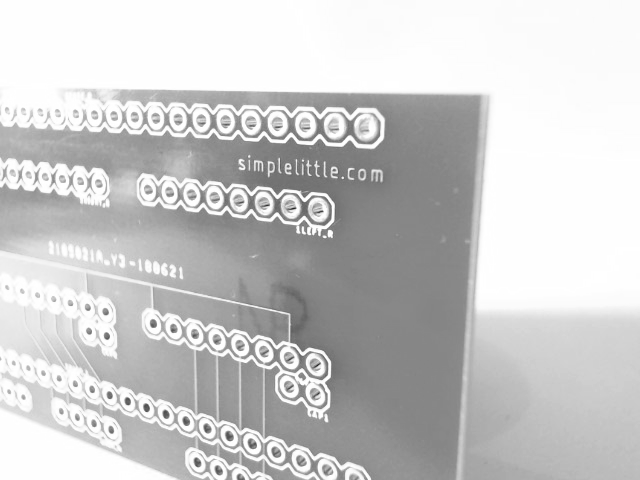

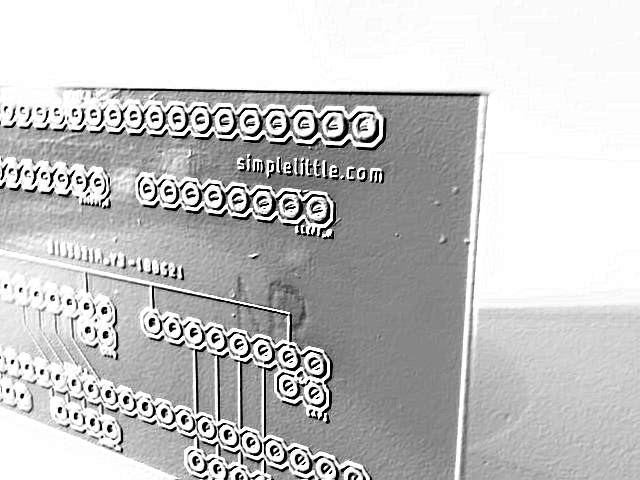

In [ ]:
kernel3 = np.array((
    [-2, -2, 0],
    [-2, 1, 2],
    [0, 2, 2]), dtype="int")           
filter3 = cv2.filter2D(gray,-1,kernel3)  

cv2_imshow(gray)
cv2_imshow(filter3)      #Does the output image remind you of filters in Photoshop?
cv2.waitKey(0)
cv2.destroyAllWindows()

Did you notice the 3x3 array of numbers again? In the context of CNNs, those numbers are known as weights of the respective convolutional (CONV) layers which the CNN will learn as part of the model training process.

Convolutional Neural Networks typically contain a series of convolutional layers (CONV), and are used together with Activation and Pooling Layers. Activation layers are usually applied after every CONV layer and Pooling layers are used to reduce the spatial dimensions. Dropout layers may also be added to prevent overfitting. The detailed implementation is outside the scope of this workshop, but you are encouraged to [read more](http://cs231n.github.io/convolutional-networks/#layers)

When training is complete, the CNN can be used to make predictions just like other machine learning models.

# 2. Fashion MNIST Modelling

Now that we have gone through the convolution operator we can move on to how we can design a convolutional neural network for our Fashion MNIST dataset. But before that, let us quickly run some code that we will be needing before we get to that stage.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

raw_data_train = pd.read_csv("/content/drive/My Drive/Classroom/[Work Files - Coach] Module 8/FMNIST/fashion-mnist_train.csv")
raw_data_test = pd.read_csv('/content/drive/My Drive/Classroom/[Work Files - Coach] Module 8/FMNIST/fashion-mnist_test.csv')

X = np.array(raw_data_train.iloc[:, 1:])
y = pd.get_dummies(np.array(raw_data_train.iloc[:, 0]))
print(y)

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=12)

im_rows, im_cols = 28, 28
input_shape = (im_rows, im_cols, 1)

# Test data
X_test = np.array(raw_data_test.iloc[:, 1:])
y_test = pd.get_dummies(np.array(raw_data_test.iloc[:, 0]))

# train and validate sets
X_train = X_train.reshape(X_train.shape[0], im_rows, im_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], im_rows, im_cols, 1)
X_test = X_test.reshape(X_test.shape[0], im_rows, im_cols, 1)

# normalisation
X_train = X_train/255
X_validate = X_validate/255
X_test = X_test/255

#!pip install --upgrade google-api-python-client  # Run if these are not installed 
 


       0  1  2  3  4  5  6  7  8  9
0      0  0  1  0  0  0  0  0  0  0
1      0  0  0  0  0  0  0  0  0  1
2      0  0  0  0  0  0  1  0  0  0
3      1  0  0  0  0  0  0  0  0  0
4      0  0  0  1  0  0  0  0  0  0
...   .. .. .. .. .. .. .. .. .. ..
59995  0  0  0  0  0  0  0  0  0  1
59996  0  1  0  0  0  0  0  0  0  0
59997  0  0  0  0  0  0  0  0  1  0
59998  0  0  0  0  0  0  0  0  1  0
59999  0  0  0  0  0  0  0  1  0  0

[60000 rows x 10 columns]


In [ ]:
import keras # main keras package
from keras.models import Sequential # sequential model
from keras.layers import Dropout, Flatten, MaxPooling2D # layers with layers operations
from keras.layers import Dense,Conv2D  # layers types

We have imported the dense and sequential functions from keras library for the purpose of model building.

### Sequential
The Sequential model allows you to first create an empty model object, and then add layers to it one after another in sequence.

### Dense
A dense layer is simply a layer of neurons in the neural network. 

Let us build a network with 6 layers. 3 layers for convolution and 3 layers for dense. Neural network designing is outside the scope of content in this course. We do, however, recommend that you read up on the topic and acquire as much knowledge as you can to guide you along the way. 

In [ ]:
num_classes = 10

#defining model
model = Sequential()

# the first layer - convolutional layer
model.add(Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding="valid",
                 input_shape=input_shape))
model.add(MaxPooling2D(2))
model.add(Dropout(0.3))

# the second layer - convolutional layer
model.add(Conv2D(128, kernel_size=3, activation='relu', kernel_initializer='he_normal', padding='valid'))
model.add(MaxPooling2D(2))
model.add(Dropout(0.3))

# the third layer - convolutional layer
model.add(Conv2D(256, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Flatten())

# the fourth layer - dense layer
model.add(Dense(256, kernel_initializer='he_normal', activation='relu'))

# the fifth layer - dense layer
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))

# The last layer - dense layer
model.add(Dense(num_classes, activation='softmax'))

We now need to compile the model using the adam optimizer and a loss function. Do you remember the use of a loss function? It is the function that we need to minimize to have a better fitting model. 

In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",     
              metrics=["accuracy"])

We can also print out the model summary after it has been compiled. Try the code below to see:
- The layers and their order in the model.
- The output shape of each layer.
- The number of parameters (weights) in each layer.
- The total number of parameters (weights) in the model.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         2

Let us now use the model.fit function. It is essentially the function that we use to train our model. We provide it with 5 main variable.
1. X (features)
2. Y (labels)
3. batch size -- is used to determine how large of a batch is input into the model at once. A larger batch size would mean faster training time but would require more capacity from your machine.
4. epochs -- represents how many times the same trainig data must be run through the model. A larger number usually means a better fit model. But over trainig can lead to overfitting at times.
5. validation data is the validation dataset which is needed to check for overfitting.

In [ ]:
tracker = model.fit(X_train, y_train,
                    batch_size=400,
                    epochs=3,
                    validation_data=(X_validate, y_validate),
                    verbose=0)

Congratulations!! You have succeeded in training a machine learning model. We do, however, want to continue on evaluating our model and measuring its performance. We will not be doing that in this notebook. So here is some code that will allow us to save our progress in the form of an object file that we can save to the computer. 

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

raw_data_train = pd.read_csv('/content/drive/My Drive/Classroom/[Work Files - Coach] Module 8/FMNIST/fashion-mnist_train.csv')
raw_data_test = pd.read_csv('/content/drive/My Drive/Classroom/[Work Files - Coach] Module 8/FMNIST/fashion-mnist_test.csv')

X = np.array(raw_data_train.iloc[:, 1:])
y = pd.get_dummies(np.array(raw_data_train.iloc[:, 0]))

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=12)

im_rows, im_cols = 28, 28
input_shape = (im_rows, im_cols, 1)

# Test data
X_test = np.array(raw_data_test.iloc[:, 1:])
y_test = pd.get_dummies(np.array(raw_data_test.iloc[:, 0]))

# train and validate sets
X_train = X_train.reshape(X_train.shape[0], im_rows, im_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], im_rows, im_cols, 1)
X_test = X_test.reshape(X_test.shape[0], im_rows, im_cols, 1)

# normalisation
X_train = X_train/255
X_validate = X_validate/255
X_test = X_test/255

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_test

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,1,0,0,0
9997,0,0,0,0,0,0,0,0,1,0
9998,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_pred

array([[7.94761300e-01, 3.71718852e-05, 3.50652059e-04, ...,
        4.34108642e-07, 1.55895003e-04, 5.20637343e-07],
       [9.72269390e-06, 9.99934435e-01, 6.35697518e-07, ...,
        7.76511389e-09, 1.27653368e-06, 5.00695974e-09],
       [1.32172406e-02, 4.19387943e-05, 9.14368451e-01, ...,
        1.30423232e-05, 5.03815420e-04, 8.13043152e-06],
       ...,
       [6.14350847e-06, 7.58160201e-09, 5.82130440e-07, ...,
        2.44217081e-05, 9.99960780e-01, 6.42431758e-07],
       [7.85968974e-02, 1.48589555e-02, 7.08554536e-02, ...,
        4.24970826e-03, 3.62839490e-01, 8.97463318e-03],
       [9.02777836e-02, 7.85383061e-02, 1.78923130e-01, ...,
        9.00608208e-03, 6.08289316e-02, 8.79822951e-03]], dtype=float32)

In [ ]:
Y_pred_classes = np.argmax(y_pred,axis = 1).reshape(10000,1)
print(Y_pred_classes)


[[0]
 [1]
 [2]
 ...
 [8]
 [8]
 [6]]


In [ ]:
Y_test_classes = np.argmax(np.array(y_test),axis = 1).reshape(10000,1)
print(Y_test_classes)


[[0]
 [1]
 [2]
 ...
 [8]
 [8]
 [1]]


In [ ]:
confusion_matrix(Y_test_classes, Y_pred_classes)

array([[839,   0,  16,  39,   3,   1,  92,   0,  10,   0],
       [  3, 970,   1,  18,   0,   2,   6,   0,   0,   0],
       [  8,   0, 674,   6, 255,   0,  52,   0,   5,   0],
       [ 20,   2,   7, 904,  46,   0,  17,   0,   3,   1],
       [  0,   0,  24,  18, 921,   1,  35,   0,   1,   0],
       [  0,   0,   0,   0,   0, 944,   0,  34,   2,  20],
       [186,   0,  74,  23, 179,   0, 527,   0,  11,   0],
       [  0,   0,   0,   0,   0,   9,   0, 853,   0, 138],
       [  1,   2,   9,   0,   7,   2,   7,   2, 969,   1],
       [  0,   0,   0,   0,   0,   1,   0,   9,   1, 989]])

### Task
Try to use the model.evaluate method to try and calculate the score (both loss and accuracy of the model)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.3725511133670807
Test accuracy: 0.859000027179718


##Task
Plot graphs for training loss and validation loss with the number of epochs, and trainig accuracy and validation accuracy with epochs.

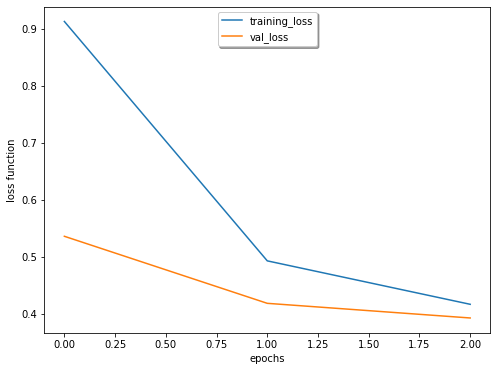

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(tracker.history["loss"], label = "training_loss")
ax.plot(tracker.history["val_loss"], label = "val_loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
ax.legend(loc = 'upper center', shadow = True,)
plt.show()

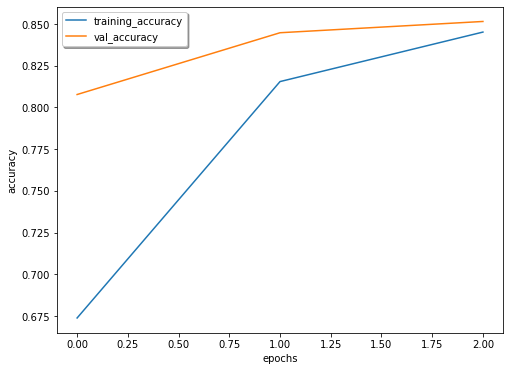

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(tracker.history["accuracy"], label = "training_accuracy")
ax.plot(tracker.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
ax.legend(loc = 'best', shadow = True,)
plt.show()

## Congratulation!! You have completed the tasks. 

Be sure to remember to think of ways that you can put what you learn to good use. Remember, with great power comes great responsibility! Use your knowledge to design and develop solutions to help people and society around you! 